# Importing Necessary Libraries

In [2]:
# For pre-processing & EDA
import re
import string
import numpy as np
import pandas as pd

In [3]:
# For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# For handling Text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
# For Training & Evaluating the model
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Reading the dataset

In [6]:
df=pd.read_csv('sentiment_data.csv', encoding='ISO-8859-1')
df.sample(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
479851,0,2179035029,Mon Jun 15 08:33:10 PDT 2009,NO_QUERY,danger_skies,@isacullen Not Aiden?
1357337,4,2047985610,Fri Jun 05 14:29:07 PDT 2009,NO_QUERY,residualninja,Ack! Just saw a Seattle tram on a test run - s...
793167,0,2326537890,Thu Jun 25 07:10:32 PDT 2009,NO_QUERY,vivz93,@weefieryredhead i want an ice cream van
300259,0,1998240344,Mon Jun 01 18:13:31 PDT 2009,NO_QUERY,MallowMania,Need to sleep but have upset stomach! WTF is i...
383663,0,2053244760,Sat Jun 06 03:50:33 PDT 2009,NO_QUERY,Aja_Hobbs,good morning!! up so early bc i can hardly bre...


# Exploratory Data Analysis

In [7]:
# The first column is treated as column's name
df=pd.read_csv('sentiment_data.csv', encoding='ISO-8859-1', names=['Target', 'Id','Date', 'Flag', 'Users', 'Text'])
df.head()

,Target,Id,Date,Flag,Users,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Asking Basic Questions to know more about the dataset

In [8]:
df.shape

(1600000, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   Id      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   Users   1600000 non-null  object
 5   Text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
df.isnull().sum()

Target    0
Id        0
Date      0
Flag      0
Users     0
Text      0
dtype: int64

In [11]:
len(df)

1600000

In [12]:
df['Target'].unique()

array([0, 4], dtype=int64)

In [13]:
df['Target'].nunique()

2

# Data Pre-Processing

In [14]:
# Selecting the Text and Target column for further analysis
data=df[['Text','Target']]
data

,Text,Target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [15]:
# Replacing the value 4 to 1 for better understanding
data['Target'] = data['Target'].replace(4,1)
data

C:\Users\Dell\AppData\Local\Temp\ipykernel_14964\651745714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Target'].replace(4,1)


,Text,Target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,1
1599996,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1


In [16]:
data['Target'].unique() # Now we have 2 unique values 0 & 1 instead of 0 & 4.

array([0, 1], dtype=int64)

### Seperating posative & negative tweets

In [17]:
df_pos=data[data['Target'] == 1]
df_pos

,Text,Target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1
...,...,...
1599995,Just woke up. Having no school is the best fee...,1
1599996,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1


In [18]:
df_pos.shape

(800000, 2)

In [19]:
df_neg=data[data['Target']==0]
df_neg

,Text,Target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
799995,Sick Spending my day laying in bed listening ...,0
799996,Gmail is down?,0
799997,rest in peace Farrah! So sad,0
799998,@Eric_Urbane Sounds like a rival is flagging y...,0


In [20]:
df_neg.shape

(800000, 2)

In [21]:
# Preparing dataset
df_positive = df_pos.iloc[:16000]
df_negative = df_neg.iloc[:16000]

df1=pd.concat([df_positive, df_negative])
df1

,Text,Target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1
...,...,...
15995,"gets new phone hopefully tomorrow, but mail do...",0
15996,@Leslie_G stack is injured are you a rowdy fa...,0
15997,@ryanbader Bummer...love Chuck.,0
15998,Kinda sad that my show time is over for now,0


In [22]:
# Converting the text of Text column in lowercase
df1['Text']=df1['Text'].str.lower()
df1['Text'].head()

800000         i love @health4uandpets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @darealsunisakim thanks for the twitter add, s...
800003    being sick can be really cheap when it hurts t...
800004      @lovesbrooklyn2 he has that effect on everyone 
Name: Text, dtype: object

In [23]:
# Stopwords in English.
stp_wrds=stopwords.words('english')
stp_wrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
# Removing stop words the tweets text
sw=set(stp_wrds)

def cleaning_stopwords(Text):
    return " ".join([word for word in str(Text).split() if word not in sw])

df1['Text']=df1['Text'].apply(lambda Text: cleaning_stopwords(Text))
df1['Text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: Text, dtype: object

In [25]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [26]:
# Cleaning & Removing punctuations
eng_punctuations=string.punctuation
punctuations_list = eng_punctuations

def cleaning_punctuations(Text):
    translator = str.maketrans('', '', punctuations_list)
    return Text.translate(translator)

df1['Text']=df1['Text'].apply(lambda x: cleaning_punctuations(x))
df1['Text'].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: Text, dtype: object

In [27]:
# Removing repeating characters
def cleaning_repeating_char(Text):
    return re.sub(r'(.)1+', r'1', Text)

df1['text']=df1['Text'].apply(lambda x: cleaning_repeating_char(x))
df1['Text'].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: Text, dtype: object

In [28]:
# Removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

df1['Text']=df1['Text'].apply(lambda x: cleaning_URLs(x))
df1['Text'].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: Text, dtype: object

In [29]:
# Cleaning and Removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

df1['Text']=df1['Text'].apply(lambda x: cleaning_numbers(x))
df1['Text'].head()

800000                    love healthuandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                        lovesbrooklyn effect everyone
Name: Text, dtype: object

In [30]:
# Tokenizing the tweet text
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df1['Text']=df1['Text'].apply(tokenizer.tokenize)
df1['Text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: Text, dtype: object

In [31]:
# Stemming
st=nltk.PorterStemmer()

def stemming_on_text(data):
    Text=[st.stem(word) for word in data]
    return data

df1['Text']=df1['Text'].apply(lambda x: stemming_on_text(x))
df1['Text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: Text, dtype: object

In [32]:
# Applying lemmatizer
lm=nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    Text = [lm.lemmatize(word) for word in data]
    return data
df1['Text']=df1['Text'].apply(lambda x: lemmatizer_on_text(x))
df1['Text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: Text, dtype: object

In [33]:
# Defining x & y
x=data.Text
y=data.Target

In [34]:
x

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: Text, Length: 1600000, dtype: object

In [35]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: Target, Length: 1600000, dtype: int64

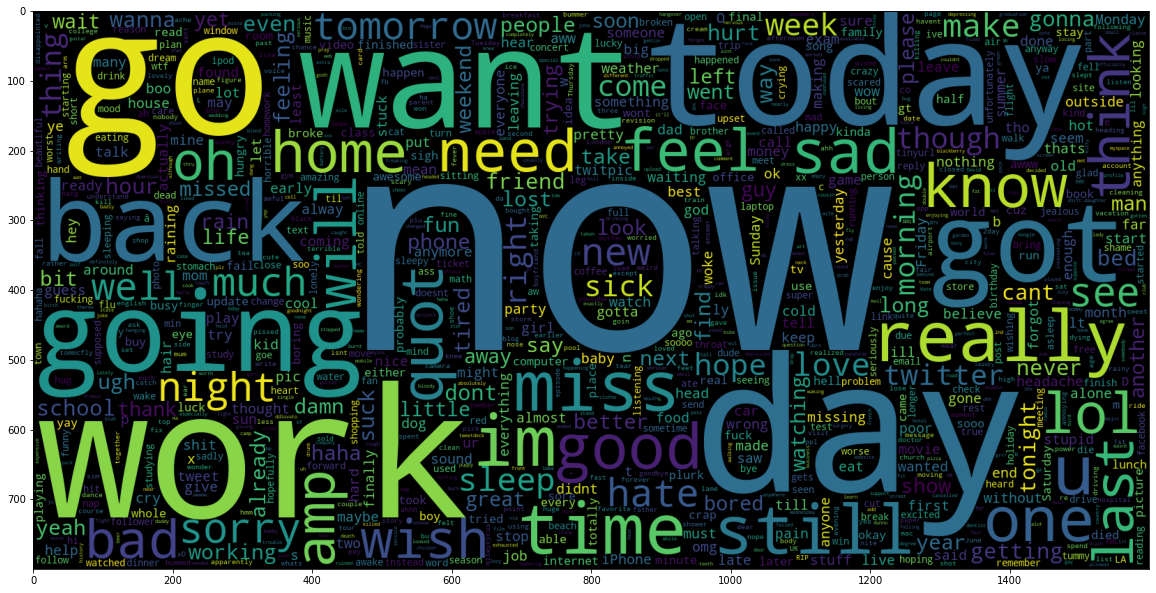

In [36]:
# Plotting word cloud for negative tweets
neg_tweets = data['Text'][:800000]

plt.figure(figsize = (20,20))
wc=WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(neg_tweets))
plt.imshow(wc)

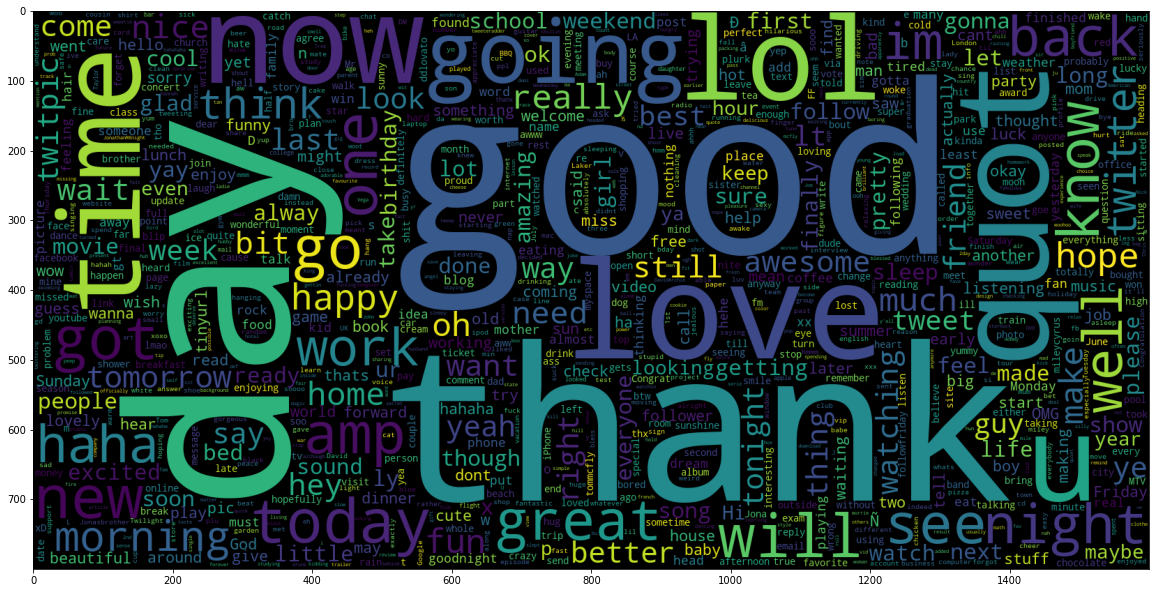

In [37]:
# Plotting word Cloud for positive tweets
pos_tweets=data['Text'][800000:]

wc=WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(pos_tweets))
plt.figure(figsize=(20,20))
plt.imshow(wc)

In [38]:
# Splitting training & testing data
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.05, random_state =26105111)

# Transforming the Dataset Using TF-IDF Vectorizer

In [39]:
# Fitting the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(x_train)

print('No. of feature_words: ', len(vectorizer.get_feature_names()))

C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


In [40]:
# Transforming the data using TF-IDF Vectorizer
x_train = vectorizer.transform(x_train)
x_test  = vectorizer.transform(x_test)

# Function Model Evaluation 

- After training the model, applying the evaluation measures to checkmodel performance.
- Parameters to check the performance of the models:
1. Accuracy Score
2. Confusion Matrix with Plot

In [41]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred=model.predict(x_test)
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Computing and plotting the Confusion matrix
    cf_matrix=confusion_matrix(y_test, y_pred)
    categories=['Negative','Positive']
    group_names=['True Neg', 'False Pos', 'False Neg', 'True Pos']

    group_percentages=['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels=[f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels=np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues',fmt='',
    xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Model Buiding

- we've used three different models :
1. Bernoulli Naive Bayes Classifier
2. SVM (Support Vector Machine)
3. Logistic Regression
- The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models, & then try to find out the one which gives the best performance among them.

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



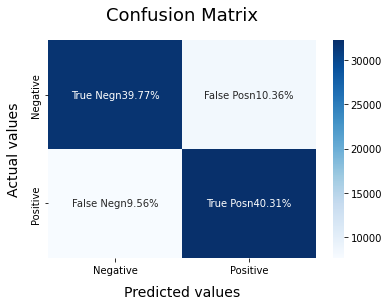

In [42]:
# 1. Bernoulli Naive Bayes Classifier
BNBmodel=BernoulliNB()
BNBmodel.fit(x_train, y_train)

model_Evaluate(BNBmodel)
y_pred1=BNBmodel.predict(x_test)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



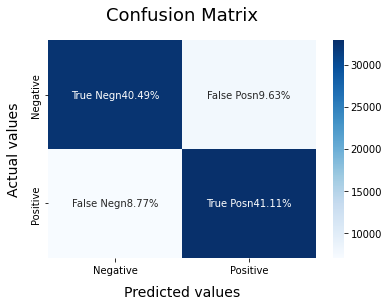

In [43]:
# 2. SVM (Support Vector Machine)
SVCmodel=LinearSVC()
SVCmodel.fit(x_train, y_train)
             
model_Evaluate(SVCmodel)
y_pred2=SVCmodel.predict(x_test)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



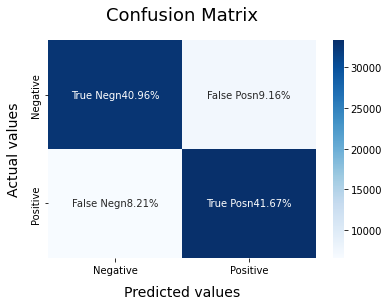

In [44]:
LRmodel=LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LRmodel.fit(x_train, y_train)

model_Evaluate(LRmodel)
y_pred3=LRmodel.predict(x_test)

# Our Observations:

- Upon evaluating all the models, we can conclude the following details i.e.

1. Accuracy: As far as the accuracy of the model is concerned, Logistic Regression performs better than SVM, which in turn performs better than Bernoulli Naive Bayes.

2. F1-score: The F1 Scores for class 0 and class 1 are :
   a. For class 0: Bernoulli Naive Bayes(accuracy = 0.90) < SVM (accuracy =0.91) < Logistic Regression (accuracy = 0.92)
   b. For class 1: Bernoulli Naive Bayes (accuracy = 0.66) < SVM (accuracy = 0.68) < Logistic Regression (accuracy = 0.69)

3. AUC Score: All three models have the same ROC-AUC score.

- We, therefore, conclude that the Logistic Regression is the best model for the above-given dataset.

- In our problem statement, Logistic Regression follows the principle of Occam’s Razor, which defines that for a particular   problem statement, if the data has no assumption, then the simplest model works the best.
- Since our dataset does not have any assumptions and Logistic Regression is a simple model.
- Therefore, the concept holds true for the above-mentioned dataset.

# Conclusion

- By doing this project, we've got a basic understanding of how Sentimental Analysis is used to understand public emotions behind people’s tweets.
- Twitter Sentimental Analysis helps us to preprocess tweets using different methods and feed it into ML models to give the best accuracy.

- Twitter Sentimental Analysis is used to identify as well as classify the sentiments that are expressed in the text source.
- Logistic Regression, SVM, and Naive Bayes are some of the ML algorithms that can be used for Twitter Sentimental Analysis.

# Frequently Asked Questions
Q1. What are the use cases of Sentimental Analysis models in the real world?

- Sentimental Analysis models are used in various industries for different purposes. Some examples are:
1. Using these models, we can get people’s opinions on social media platforms or social networking sites regarding specific topics.
2. Companies use these models to know the success or failure of their product by analyzing the sentiment of the product reviews and feedback from the people.
3. Health industries use these models for the text analysis of patients’ feedback and improve their services based on that.
4. We can also find new marketing trends and customer preferences using these models.


Q2. What are the steps for sentiment analysis of Twitter data in Python?

- Given below are the steps for implementing Sentiment Analysis of Twitter in Python:
1. Firstly we will gather the required Tweets from Twitter.
2. We will clean the data using different pre-processing techniques.
3. After cleaning the data, we will create the sentimental analysis model using different machine learning algorithms.
4. We will analyze our Twitter data using our sentiment analysis model on the basis of sentiment score, i.e., a positive, negative, or neutral tweet.
5. Eventually, we will visualize the output from our model.

Q3. Which algorithm is used in Twitter sentiment analysis?

- Machine Learning algorithms like Naive Bayes, Logistic Regression, SVM, and deep learning algorithms like RNN can be used to create Twitter Sentiment Analysis.